<a href="https://colab.research.google.com/github/sgusshina/ML/blob/main/hw1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание
Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.



**Этапы работы**:

1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

3. Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

5. Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
x_data_generated

array([[ 0.36032967, -1.21133757,  0.47220338, ...,  1.15749752,
         2.02255678, -0.32483345],
       [ 0.3505227 , -0.3626768 ,  1.31751301, ...,  1.05404707,
        -0.87483736, -1.31490984],
       [ 0.50057789,  1.12074543, -0.03372008, ...,  0.54826842,
        -1.28830729,  0.17696592],
       ...,
       [-0.93512976,  1.5378858 , -0.76920316, ...,  0.37889002,
         0.95250776, -1.0872627 ],
       [-1.75565789,  0.06851601,  0.15037035, ...,  0.90772579,
         0.14960033, -2.0409539 ],
       [ 0.72180223, -1.41540598,  0.66013777, ..., -0.82077328,
         1.33351618,  0.78442439]])

In [ ]:
data_generated = pd.DataFrame (x_data_generated,columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
data_generated['Целевая переменная'] = y_data_generated
data_generated

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Целевая переменная
0,0.360330,-1.211338,0.472203,0.306292,1.199336,0.678461,0.612390,-0.183647,0.359821,-0.362803,...,1.629583,0.114155,-0.148132,0.728392,0.046358,0.968296,1.157498,2.022557,-0.324833,1
1,0.350523,-0.362677,1.317513,-0.213051,2.592856,-1.327761,1.519897,0.512308,-0.535004,-2.421977,...,0.427107,-2.014366,-1.030900,-2.228198,0.311538,-1.337725,1.054047,-0.874837,-1.314910,1
2,0.500578,1.120745,-0.033720,0.736836,-0.575280,-0.382032,-0.166395,0.431631,-0.699235,-0.890191,...,1.090274,1.608470,0.184762,1.479636,1.028342,-0.894394,0.548268,-1.288307,0.176966,0
3,0.286213,0.299820,0.671699,0.164910,0.806131,0.585607,0.645668,-0.060599,0.073579,-2.199771,...,0.218849,-0.059379,1.645152,-0.828559,0.327092,-1.772784,-0.826620,-1.028970,-2.259267,1
4,-1.493784,1.675412,0.346466,-0.382733,1.004608,-0.729066,0.480546,1.318714,-0.432881,-0.033018,...,-0.484072,1.029256,-0.812995,-0.240743,1.293896,-1.063928,-0.175061,0.865439,-0.047480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.660629,-0.075155,0.223308,0.764120,0.872675,-0.606823,0.366138,0.933995,-0.378749,0.400016,...,0.577738,-1.822082,2.004492,0.119386,0.711254,-0.499443,0.687115,0.648734,3.013031,1
96,0.986529,1.023386,0.358788,-0.389436,0.935037,0.169517,0.471257,-1.208820,0.717048,-0.231206,...,-0.076415,-0.422914,-0.596788,0.047851,-0.615594,-0.418603,-0.166158,-0.078754,-0.365017,1
97,-0.935130,1.537886,-0.769203,0.540360,-1.526701,-1.174107,-0.890596,-0.271644,-0.865855,1.389859,...,0.611965,-0.738358,0.289280,-1.792430,-1.778511,2.275306,0.378890,0.952508,-1.087263,0
98,-1.755658,0.068516,0.150370,1.523782,0.934004,0.115266,0.333320,-0.332137,-1.109832,0.917403,...,1.025724,-0.408721,0.388033,-0.928931,-1.307104,-0.982936,0.907726,0.149600,-2.040954,1


Обучим модель на исходных данных

In [ ]:
from sklearn.model_selection import train_test_split
X = data_generated.drop(columns='Целевая переменная')

X_train, X_test, y_train, y_test = train_test_split(X,data_generated['Целевая переменная'], test_size = 0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression ()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test

,Целевая переменная
83,0
53,0
70,0
45,0
44,0
39,1
22,0
80,1
10,1
0,1


In [ ]:
mean_score_no_feature_selection = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
mean_score_no_feature_selection

np.float64(0.9399999999999998)

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.score(X_train,y_train)

1.0

Средняя точность модели - 93,9 %, точность модели на тестовой выборке - 100%, на обучающей - 100%

**Используем разные методы отбора признаков**

1. Стастистический метод отбора признаков

а) матрица корреляций

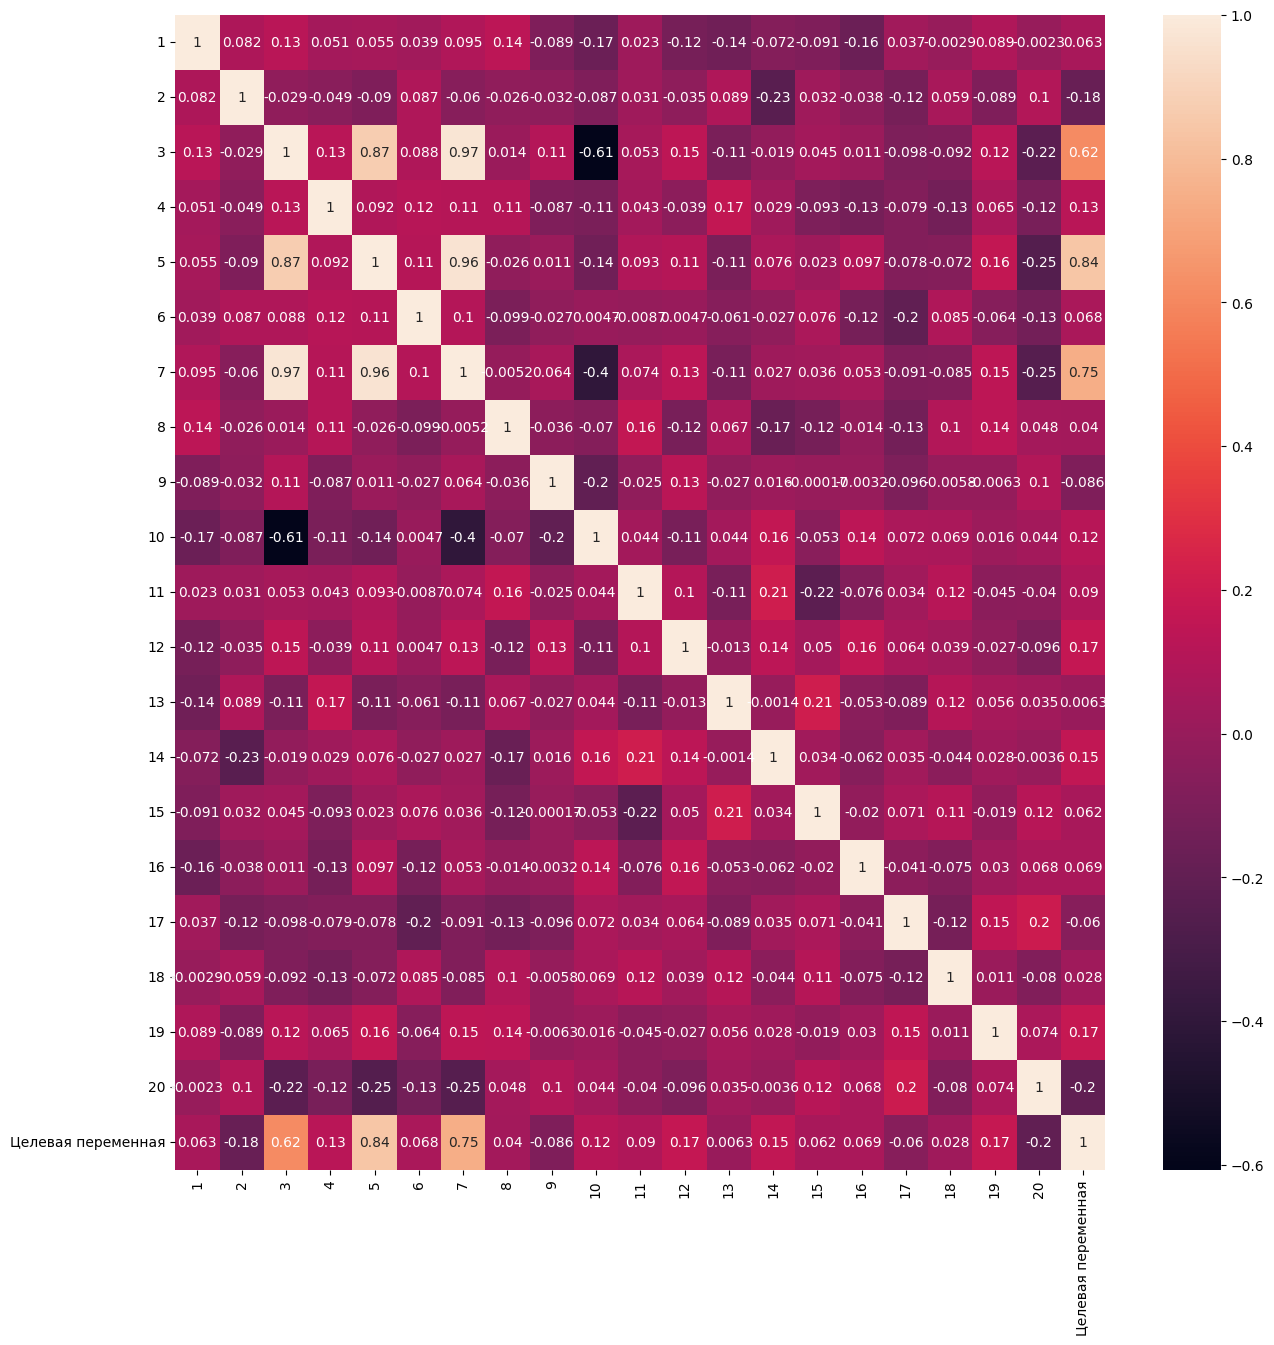

In [ ]:

plt.figure(figsize=(15,15))
sns.heatmap(data_generated.corr(),annot=True)
plt.show()


Самую большую корреляцию с целевой переменной имеют признаки 3,5,7. Обучим модель только на них и посмотрим метрику accuracy

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_generated[['3','5','7']], data_generated['Целевая переменная'], test_size = 0.2, random_state= 42)

In [ ]:
X_train_1

,3,5,7
55,-0.416671,0.256606,-0.210962
88,-0.519358,-0.807797,-0.545451
26,0.157223,0.026894,0.110597
42,0.189233,1.157724,0.415039
69,0.039518,-0.224108,-0.030039
...,...,...,...
60,-0.661359,-1.442128,-0.798168
71,-0.730902,-1.513113,-0.861891
14,-0.072743,0.859877,0.167364
92,0.439262,1.399668,0.640817


In [ ]:
model.fit(X_train_1,y_train_1)

LogisticRegression()

In [ ]:
model.score(X_test_1,y_test_1)

0.95

In [ ]:
model.score(X_train_1,y_train_1)

0.925

In [ ]:
mean_score_corr = cross_val_score(LogisticRegression(),data_generated[['3','5','7']] , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_corr

np.float64(0.9400000000000001)

Средняя точность модели повысилась, точность на обучающей выборке упала, точность на тестовой выборке также понизилась

б) Удаление низковариативных признаков (VarianceThreshold).

In [ ]:
from sklearn.feature_selection import VarianceThreshold


selector = VarianceThreshold()
selector.fit_transform(X_train)

name_columns = selector.get_feature_names_out()
X_tr = selector.transform(X_train)
X_ts = selector.transform(X_test)
print(f"Признаки, которые остаются для обучения модели - {name_columns}")


Признаки, которые остаются для обучения модели - ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20']


In [ ]:
model.fit(X_tr,y_train)

LogisticRegression()

In [ ]:
model.score(X_ts,y_test)

1.0

In [ ]:
model.score(X_tr,y_train)

1.0

In [ ]:
mean_score_varience = cross_val_score(LogisticRegression(),data_generated[['3','5','7']] , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_varience

np.float64(0.9400000000000001)

МОдель VarianceThreshold не удалила никакие признаки, что в целом необычно.

2. Отбор признаков на основе дисперсионного анализа:

а) Выбор  5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_generated.drop(columns='Целевая переменная'), data_generated['Целевая переменная'], test_size = 0.2, random_state= 42)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=5)
X_tr_new = selector.fit_transform(X_train_new, y_train_new)
X_ts_new = selector.transform(X_test_new)

name_columns = selector.get_feature_names_out()
print(f"Признаки, которые остаются для обучения модели - {name_columns}")

Признаки, которые остаются для обучения модели - ['2' '3' '5' '7' '19']


In [ ]:
model.fit(X_tr_new,y_train_new)

LogisticRegression()

In [ ]:
mean_score_fclassif = cross_val_score(LogisticRegression(),data_generated[name_columns] , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_fclassif

np.float64(0.93)

In [ ]:
model.score(X_ts_new,y_test_new)

0.95

In [ ]:
model.score(X_tr_new,y_train_new)

0.925

Средняя точность модели упала.

3. Отбор с использованием моделей:


a) Отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.


Выполним отбор признаков с помощью l1-регуляризации

/tmp/ipython-input-287-2405664785.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')  # 20 цветов


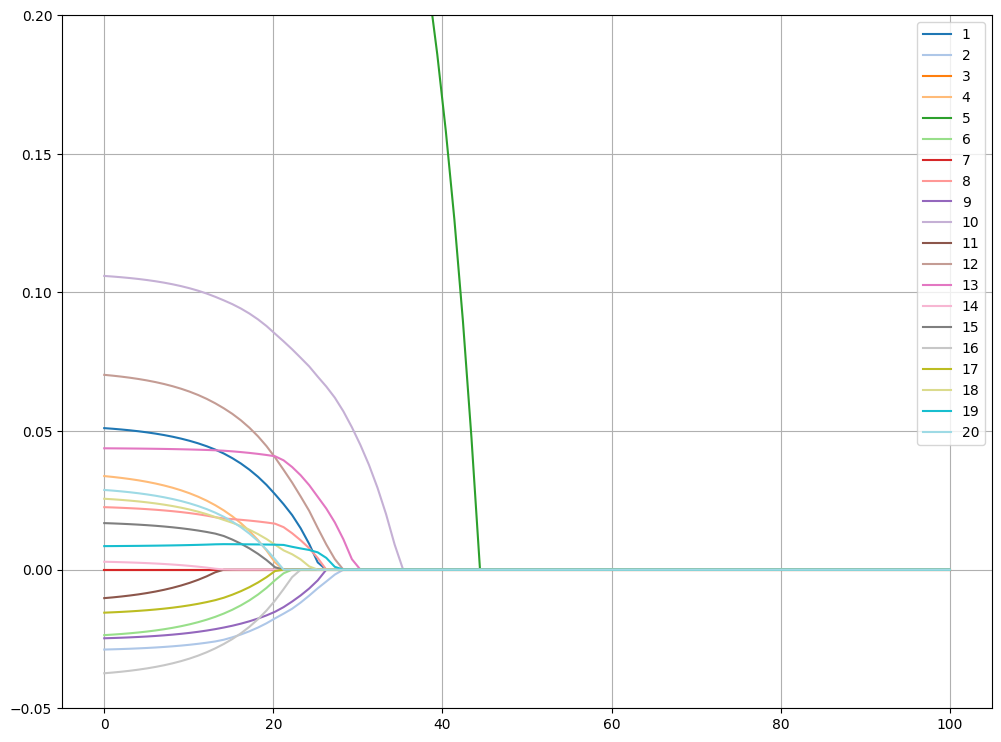

In [ ]:
from sklearn.linear_model import Lasso
lg_l,pred_l = [], []

names = data_generated.columns
list_l = list(2**np.linspace(-10,10,100))


# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_train_new, y_train_new)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l)) ## генерируем X для построения графика
cmap = plt.cm.get_cmap('tab20')  # 20 цветов
for i, coef in enumerate(np.vstack(pred_l).T):
    plt.plot(x_l, np.sign(coef) * np.abs(coef),
             color=cmap(i % 20),  # Циклический выбор цвета
             label=names[i])

plt.ylim(-0.05,0.2)
plt.legend(names)
plt.grid()

По графику можно посмотреть, какие признаки обнулились быстрее остальных (они являются бесполезными)  - 14,20,15,11,17 - на данном этапе выберем 5 признаков

Далее подадим оставшиеся признаки в логистическую регрессию

In [ ]:
columns = ['11','14','15','17','20','Целевая переменная']
X_data_drop_features = data_generated.drop(columns=columns)



In [ ]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_data_drop_features, data_generated['Целевая переменная'], test_size = 0.2, random_state= 42)

In [ ]:
X_test_drop.shape

(20, 15)

In [ ]:
model_fit = model.fit(X_train_drop,y_train_drop)

In [ ]:
mean_score_l1 = cross_val_score(LogisticRegression(),X_data_drop_features , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_l1

np.float64(0.96)

In [ ]:
model.score(X_test_drop,y_test_drop)

1.0

Странно, что точность на тестовой выборке равна единице, то есть модель аболютно точно предсказывает целевую переменную. При этом средняя точность повысилась до 96%

Теперь эту модель заведем в SelectFromMode

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model_fit, prefit=False, max_features=5, threshold=-np.inf)
X_tr = selector.fit_transform(X_train_drop, y_train_drop)
X_t = selector.transform(X_test_drop)
names = selector.get_feature_names_out()

names

array(['1', '3', '5', '7', '10'], dtype=object)

In [ ]:
model.fit(X_tr,y_train_drop)

LogisticRegression()

In [ ]:
model.score(X_t,y_test_drop)

0.95

In [ ]:
mean_score_select = cross_val_score(LogisticRegression(),data_generated[names] , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_select

np.float64(0.97)

Точность на тестовой выборке уменьшилась, средняя точность повысилась до 97 %

б) Отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
rf = model_rf.fit(X_train,y_train)

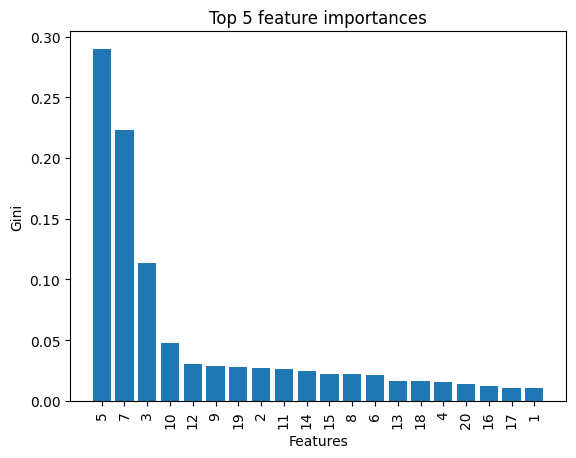

In [ ]:
imp = pd.Series(rf.feature_importances_, index=X_train.columns)
imp = imp.sort_values(ascending=False)

plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.index, imp)
plt.xticks(rotation = 90)
plt.show()

Модель определила в качестве бесполезных прзнаки 1,17,16,20, 4 и тд (назовем первые 5). С помощью регрессии Лассо были определены как бесполезные признаки 14,20,15,11,17. Оба метода одинаково выбрали признаки 17,20

Обучим модель на всех признаках, кроме 5 самых бесполезных

In [ ]:
columns = ['17','20','1','16','4','Целевая переменная']
X_data_drop_features_rf = data_generated.drop(columns=columns)


In [ ]:
X_train_drop_rf, X_test_drop_rf, y_train_drop_rf, y_test_drop_rf = train_test_split(X_data_drop_features_rf, data_generated['Целевая переменная'], test_size = 0.2, random_state= 42)

In [ ]:
X_train_drop_rf

,2,3,5,6,7,8,9,10,11,12,13,14,15,18,19
55,0.049683,-0.416671,0.256606,0.591246,-0.210962,-0.049783,-2.246605,2.780283,-0.363293,-0.678313,0.311969,-0.179881,-0.757089,0.648917,0.507947
88,-0.699486,-0.519358,-0.807797,-0.012603,-0.545451,0.286159,-1.233846,1.355676,-0.574601,0.083483,0.591353,-1.497711,-0.323232,-1.078304,0.082988
26,-1.271583,0.157223,0.026894,-0.281826,0.110597,-1.163556,1.065194,-0.817614,-0.028667,1.767747,0.999277,0.298169,1.710136,-0.168120,-1.416735
42,-0.071464,0.189233,1.157724,0.404103,0.415039,0.576137,1.506784,1.121445,-0.566959,1.021289,0.288919,0.606537,0.346533,-0.735701,1.018434
69,-0.624255,0.039518,-0.224108,0.727817,-0.030039,2.439196,0.937890,-0.637456,0.824373,-0.682786,1.216835,0.742033,-0.087856,0.252061,0.758852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.747810,-0.661359,-1.442128,0.242179,-0.798168,-1.087152,-0.814946,0.952754,-0.049801,0.163217,1.265003,1.019964,-1.398010,0.292167,-1.552790
71,0.704667,-0.730902,-1.513113,-2.225887,-0.861891,2.135181,-0.461276,1.203844,0.208199,-1.272914,0.782346,0.627075,1.342720,0.653725,1.551672
14,0.432632,-0.072743,0.859877,-0.123640,0.167364,-1.028029,0.325016,2.010383,-0.601860,0.609472,-1.577654,-2.407407,0.257377,-0.042853,-0.242612
92,-0.280839,0.439262,1.399668,-0.664504,0.640817,1.175080,0.395794,0.193865,1.778407,-0.536490,-1.075854,0.344605,-0.575036,0.815281,0.191286


In [ ]:
model_rf.fit(X_train_drop_rf, y_train_drop_rf)

RandomForestClassifier(random_state=1)

In [ ]:
model_rf.score(X_test_drop_rf,y_test_drop_rf)

0.95

In [ ]:
mean_score_rf = cross_val_score(LogisticRegression(),X_data_drop_features_rf , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_rf

np.float64(0.9400000000000001)

Средняя точность модели понизилась по сравнению с отбором признаков через регуляризацию l1 и feature selection

Перебор признаков

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    LogisticRegression(random_state=1), n_features_to_select=5, direction="forward"
)
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=1),
                          n_features_to_select=5)

In [ ]:
X_tr_forward = sfs_forward.transform(X_train)
X_t_forward = sfs_forward.transform(X_test)

In [ ]:
names_forward = sfs_forward.get_feature_names_out()
names_forward

array(['1', '2', '3', '5', '10'], dtype=object)

In [ ]:
X_t_forward.shape

(20, 5)

In [ ]:
model.fit(X_tr_forward,y_train)

LogisticRegression()

In [ ]:
model.score(X_t_forward,y_test)

1.0

In [ ]:
mean_score_forward = cross_val_score(LogisticRegression(),data_generated[names_forward] , data_generated['Целевая переменная'], scoring='accuracy').mean()
mean_score_forward

np.float64(0.9800000000000001)

Метрика средней точности повысилась

Вывод: были выполнены разные методы отбора признаков - одномерный отбор (с помощью корреляционного анализа и удаления низковариативных признаков VarienceThreshold),дисперсионный анализа (с помощью функции f_classif), с использованием моделей (регуляризации Лассо (l1-регуляризации) случайного леса и SelectFromModel), а также с помощью прямого перебора признаков. Результаты средней точности accuracy для данных методов представлены в таблице ниже. Самая высокая средняя точность наблюдается при переборе признаков - 98%

In [ ]:
data_mean_accuracy = pd.DataFrame({
    "Точность модели со всеми признаками": [mean_score_no_feature_selection],
    "Отбор признаков через корреляцию": [mean_score_corr],
    "Удаление низковариативных признаков": [mean_score_varience],
    "Отбор через диспресионный анализ": [mean_score_fclassif],
    "Отбор через l1-регуляризацию": [mean_score_l1],
    "Отбор важных признаков через случайный лес": [mean_score_rf],
    "Перебор признаков": [mean_score_forward],
})
data_mean_accuracy

,Точность модели со всеми признаками,Отбор признаков через корреляцию,Удаление низковариативных признаков,Отбор через диспресионный анализ,Отбор через l1-регуляризацию,Отбор важных признаков через случайный лес,Перебор признаков
0,0.94,0.94,0.94,0.93,0.96,0.94,0.98
